In [1]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 12})
import matplotlib.pyplot as plt

from cmcrameri.cm import *
import matplotlib.patheffects as pe
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Rectangle

import pandas as pd
import numpy as np
import os
import shutil
from glob import glob
from copy import deepcopy
import netCDF4 as nc

unit_Rjup = 69.911e3 # m
unit_Rear = 6.371e3  # m
unit_Mjup = 1.898e27 # kg
unit_Mear = 5.972e24 # kg

Gconst = 6.6743e-11

R_earth = 6.371e6
M_earth = 5.972e24
bar = 1e5 # Pa
S_earth =1361.0

# %matplotlib widget
%config InlineBackend.figure_format = 'retina'

In [9]:
output_dir = "../../out/"
ncdfs = glob(output_dir + "*.nc")

In [22]:
def read_nc(fpath):
    #Read NetCDF output file
    print(fpath)

    ds = nc.Dataset(fpath)

    data_t = np.array(ds["tmpl"][:], copy=True, dtype=float)
    data_p = np.array(ds["pl"][:], copy=True, dtype=float)
    data_r = np.array(ds["rl"][:], copy=True, dtype=float)

    ds.close()

    return data_t, data_p, data_r


In [23]:
data = [read_nc(nc) for nc in ncdfs]
print("Done")

../../out/cg_RCE.nc
../../out/r2_RCE.nc
../../out/cg_AdS.nc
../../out/r2_AdS.nc
../../out/sg_Ad.nc
../../out/sg_Iso.nc
../../out/cg_Ad.nc
../../out/r2_Ad.nc
../../out/r2_Iso.nc
../../out/cg_Iso.nc
../../out/sg_AdS.nc
../../out/sg_RCE.nc
Done


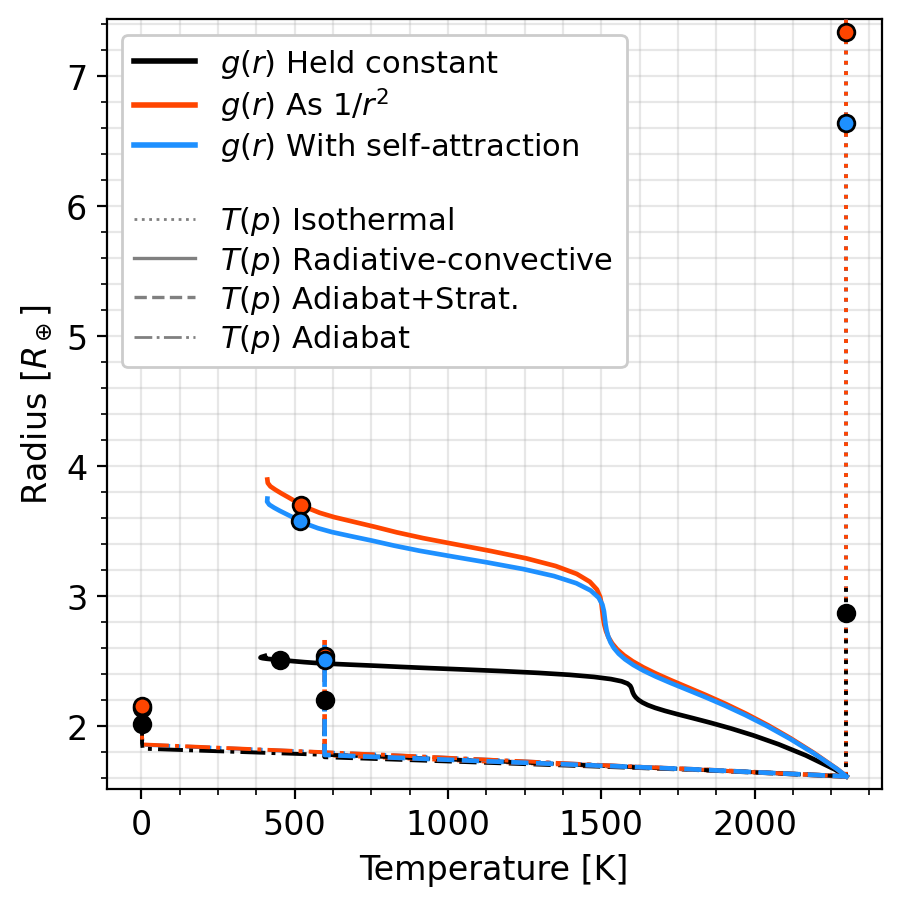

In [98]:
fig,ax = plt.subplots(1,1, figsize=(5,5))


col_sg = "dodgerblue"
col_r2 = "orangered"
col_cg = "black"

lstyles = {"Iso":"dotted", "Ad":"dashdot", "AdS":"dashed", "RCE":"solid"}
lwidths = {"Iso":1, "Ad":1, "AdS":1.2, "RCE":1.2}

lw0 = 1.4

y_max = 1.0
y_min = 10.0
for f,d in zip(ncdfs, data):
    name = f.split("/")[-1].split(".")[0]
    # print(name)

    grav, prof = name.split("_")

    if grav == "cg":
        c = col_cg
    elif grav == "r2":
        c = col_r2
    elif grav == "sg":
        c = col_sg
    else:
        raise ValueError("Invalid gravity: " + grav)

    ls = lstyles[prof]
    lw = lwidths[prof] * lw0

    x = d[0]
    y = d[2] / R_earth
    ax.plot(x,y, color=c, ls=ls, lw=lw, zorder=10)

    iphot = np.argmin(np.abs(d[1]- 20*1e-3*1e5))
    tphot = d[0][iphot]
    rphot = d[2][iphot] / R_earth
    ax.scatter(tphot, rphot, color=c, edgecolors='k', zorder=12)

    y_max = max(y_max, rphot)
    y_min = min(y_min, np.amin(y))

# legend entries
llw = 2
ax.plot([], [], lw=llw, label=r"$g(r)$ Held constant",    c=col_cg)
ax.plot([], [], lw=llw, label=r"$g(r)$ As $1/r^2$",       c=col_r2)
ax.plot([], [], lw=llw, label=r"$g(r)$ With self-attraction",  c=col_sg)
ax.plot([],[], label=" ", c='w')
ax.plot([], [],         label=r"$T(p)$ Isothermal",          c="grey",      ls=lstyles["Iso"], lw=lwidths["Iso"]  )
ax.plot([], [],         label=r"$T(p)$ Radiative-convective ",c="grey",      ls=lstyles["RCE"], lw=lwidths["RCE"]  )
ax.plot([], [],         label=r"$T(p)$ Adiabat+Strat.",      c="grey",      ls=lstyles["AdS"], lw=lwidths["AdS"]  )
ax.plot([], [],         label=r"$T(p)$ Adiabat",             c="grey",      ls=lstyles["Ad"], lw=lwidths["Ad"]  )
ax.legend(loc='upper left', fontsize=11, framealpha=1, labelspacing=0.2).set_zorder(999)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(500))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(125))
ax.set_xlabel("Temperature [K]")

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1.0))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
ax.set_ylabel(r"Radius [$R_\oplus$]")
ax.set_ylim(bottom=y_min-0.1, top=y_max+0.1)

ax.grid(zorder=-10, alpha=0.3, which='both')


plt.show()
fig.savefig(output_dir+"atmosphere.pdf", bbox_inches='tight')